In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results_dir = "results"
charts_dir = "charts"

res_my_cro_cuda = pd.read_csv(f"{results_dir}/my_cro_cuda.csv")
res_my_cro_cpu = pd.read_csv(f"{results_dir}/my_cro_cpu.csv")
res_my_abc_cuda = pd.read_csv(f"{results_dir}/my_abc_cuda.csv")
res_my_abc_cpu = pd.read_csv(f"{results_dir}/my_abc_cpu.csv")
res_my_sa_cuda = pd.read_csv(f"{results_dir}/my_sa_cuda.csv")
res_my_sa_cpu = pd.read_csv(f"{results_dir}/my_sa_cpu.csv")

res_their_cro = pd.read_csv(f"{results_dir}/their_cro.csv")
res_their_abc = pd.read_csv(f"{results_dir}/their_abc.csv")
res_their_sa = pd.read_csv(f"{results_dir}/their_sa.csv")

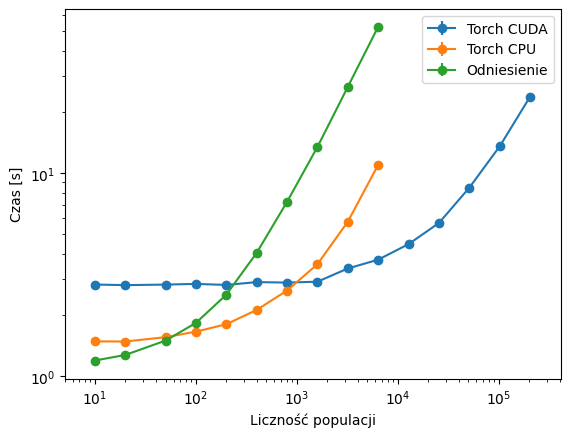

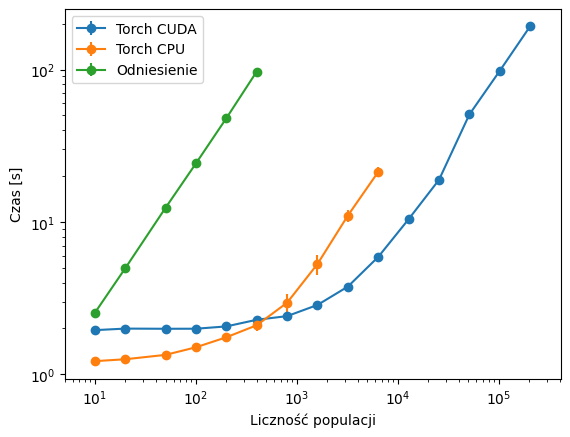

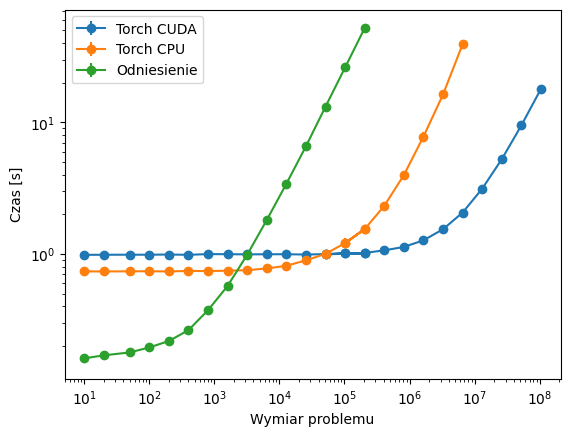

In [3]:
def plot_series(
    series: list[pd.DataFrame],
    param: str,
    xlabel: str,
    out_file: str = None,
):
    labels = ["Torch CUDA", "Torch CPU", "Odniesienie"]
    for serie, label in zip(series, labels):
        plt.errorbar(
            serie[param],
            serie["mean"],
            yerr=serie["stddev"],
            marker="o",
            label=label,
        )

    plt.xlabel(xlabel)
    plt.ylabel("Czas [s]")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(
        min([serie[param].min() for serie in series]) / 2,
        max([serie[param].max() for serie in series]) * 2,
    )
    plt.legend()

    if out_file:
        plt.savefig(out_file)
    plt.show()


plot_series(
    [res_my_cro_cuda, res_my_cro_cpu, res_their_cro],
    param="parameter_n_population",
    xlabel="Liczność populacji",
    out_file=f"{charts_dir}/cro.png",
)

plot_series(
    [res_my_abc_cuda, res_my_abc_cpu, res_their_abc],
    param="parameter_n_population",
    xlabel="Liczność populacji",
    out_file=f"{charts_dir}/abc.png",
)


plot_series(
    [res_my_sa_cuda, res_my_sa_cpu, res_their_sa],
    param="parameter_n_dim",
    xlabel="Wymiar problemu",
    out_file=f"{charts_dir}/sa.png",
)

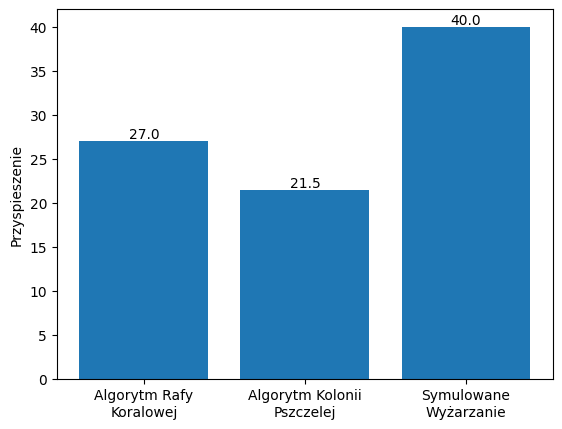

In [4]:
import numpy as np

# CRO, ABC: 10^4x10^4
# SA: 10^8
# [CRO, ABC, SA]
time_cuda = np.array([2, 5.9, 1.9])
time_cpu = np.array([54, 127, 76])

time_cro_their = 72

speedup = time_cpu / time_cuda
plt.bar(
    ["Algorytm Rafy\nKoralowej", "Algorytm Kolonii\nPszczelej", "Symulowane\nWyżarzanie"],
    speedup,
)
for i, v in enumerate(speedup):
    plt.text(i, v + 0.3, f"{round(v, 1)}", ha="center")
plt.ylabel("Przyspieszenie")
plt.savefig(f"{charts_dir}/speedup.png")
plt.show()